# Лабораторная работа 212: Вынужденные колебания в цепях переменного тока

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from IPython.display import Image

In [23]:
r = 50 
z = 100
L = 20 * 10 ** (-3)
C = 10 ** (-6)
R_out = 5
R_com = r + R_out
nu = np.array([400, 800, 1200])
omega = nu * 2 * np.pi

In [24]:
def calc(teor, exp):
    return abs(teor - exp) / teor

# Изучение полных сопротивлений элементов цепей переменного тока

## 1) С резистором

In [25]:
Uz = np.array([1.42, 1.42, 1.42]) * (2 ** 0.5)
Ur = np.array([0.71, 0.71, 0.716]) * (2 ** 0.5)

I = Uz / z

In [26]:
df = pd.DataFrame({"Частота, Гц": nu, 
                   "Uz, В": Uz, 
                   "Ur, В": Ur, 
                   "Ток, А": I, 
                   "Разность фаз": [0, 0, 0], 
                   "Полное сопротивление, Ом": np.array([z + R_com]*3)})
df

,"Частота, Гц","Uz, В","Ur, В","Ток, А",Разность фаз,"Полное сопротивление, Ом"
0,400,2.008183,1.004092,0.020082,0,155
1,800,2.008183,1.004092,0.020082,0,155
2,1200,2.008183,1.012577,0.020082,0,155


## 2) С индуктивностью

In [27]:
Ur = np.array([1.21, 0.90, 0.69]) * (2 ** 0.5)
Ul = np.array([1.48, 2.12, 2.39]) * (2 ** 0.5)

I = Ur / R_com

ind_R_pr = Ul / I
ind_R_th = (R_com ** 2 + (omega * L) ** 2) ** 0.5

In [7]:
df = pd.DataFrame({"Частота, Гц": nu, 
                   "Ul, В": Ul, 
                   "Ur, В": Ur, 
                   "Ток, А":I, 
                   "Разность фаз":["π/2", "π/2", "π/2"], 
                   "Полное сопротивление (теоретическое), Ом": ind_R_th, 
                   "Полное сопротивление (практическое), Ом": ind_R_pr,
                   "Погрешность": calc(ind_R_th, ind_R_pr)})
df

,"Частота, Гц","Ul, В","Ur, В","Ток, А",Разность фаз,"Полное сопротивление (теоретическое), Ом","Полное сопротивление (практическое), Ом",Погрешность
0,400,2.093036,1.711198,0.031113,π/2,74.509186,67.272727,0.097122
1,800,2.998133,1.272792,0.023142,π/2,114.592648,129.555556,0.130575
2,1200,3.379970,0.975807,0.017742,π/2,160.513453,190.507246,0.186862


## 3) С конденсатором

In [46]:
Ur = np.array([0.36, 0.67, 0.90]) * (2 ** 0.5)
Uc = np.array([2.83, 2.64, 2.4]) * (2 ** 0.5)

I = Ur / R_com

cond_R_pr = Uc / I
cond_R_th = (R_com ** 2 + 1 / (omega * C) ** 2) ** 0.5

In [48]:
df = pd.DataFrame({"Частота, Гц": nu, 
                   "Uc, В": Uc , 
                   "Ur, В": Ur, 
                   "Ток, А": I, 
                   "Разность фаз": ["π/2", "π/2", "π/2"], 
                   "Полное сопротивление (теоретическое), Ом": cond_R_th, 
                   "Полное сопротивление (практическое), Ом": cond_R_pr,
                   "Погрешность": calc(cond_R_th, cond_R_pr)})
df

,"Частота, Гц","Uc, В","Ur, В","Ток, А",Разность фаз,"Полное сопротивление (теоретическое), Ом","Полное сопротивление (практическое), Ом",Погрешность
0,635,4.002224,0.509117,0.009257,π/2,256.601363,432.361111,0.684953
1,950,3.733524,0.947523,0.017228,π/2,176.328698,216.716418,0.229048
2,1210,3.394113,1.272792,0.023142,π/2,142.569046,146.666667,0.028741


## 4) R + C

In [38]:
Uz = np.array([4.5, 3.91, 3.48]) * (2 ** 0.5)
Ur = np.array([0.55, 0.88, 1.04]) * (2 ** 0.5)

# Расчет тока через цепь (используем напряжение на резисторе)
I = Ur / R_com  # Такой расчет корректен для последовательной цепи

# Экспериментальное полное сопротивление цепи
Z_pr = Uz / I  # Полное сопротивление из измерений

# Теоретическое полное сопротивление для последовательной RC-цепи
Z_th = np.sqrt(R_com**2 + (1/(omega * C))**2)

Z_exp = Uz / I  # экспериментальное полное сопротивление
phase = np.array([np.degrees(np.asin(0.95)), np.degrees(np.asin(9/12)), np.degrees(np.asin(9/14))])
psi = abs(np.arctan((L*omega - (1 / (omega * C)))/R_com)* 180/np.pi)

In [39]:
df = pd.DataFrame({
    "Частота, Гц": nu,
    "Uc, В": Uc,
    "Uz, В": Uz,
    "Ur, В": Ur,
    "Ток, А": I,
    "Разность фаз": phase,
    "Теоретическая разность фаз:": psi,
    "Полное сопротивление (теоретическое), Ом": Z_th,
    "Полное сопротивление (экспериментальное), Ом": Z_exp,
    "Погрешность": calc(Z_th, Z_exp)  
})

df

,"Частота, Гц","Uc, В","Uz, В","Ur, В","Ток, А",Разность фаз,Теоретическая разность фаз:,"Полное сопротивление (теоретическое), Ом","Полное сопротивление (экспериментальное), Ом",Погрешность
0,635,4.002224,6.363961,0.777817,0.014142,71.805128,72.154749,256.601363,450.000000,0.753693
1,950,3.733524,5.529575,1.244508,0.022627,48.590378,41.201261,176.328698,244.375000,0.385906
2,1210,3.394113,4.921463,1.470782,0.026741,40.005201,20.460155,142.569046,184.038462,0.290873


# Изучение процесса установления колебаний (сложная схема (сопротивление и конденсатор))

## Расчет разности фаз

$\psi = arctg \left( \frac{Lω - \frac{1}{ωC}}{R} \right)$

## Расчет добротности

$Q_{th} = \frac{1}{R} \sqrt{\frac{L}{C}}$

$Q_{pr} = \frac{ω}{Δω} = \frac{ν}{Δν}$ 

#### 10 Ом

In [54]:
R_proc = 10
R = r + R_proc

nu = np.array([750, 950, 1180])

omega = nu * 2 * np.pi
psi = abs(np.arctan((L*omega - (1 / (omega * C)))/R_proc)* 180/np.pi)

U_amp = np.array([7.04 * 0.7, 7.04 , 7.04 *  0.7])

Q_pr = nu[1] / (nu[2] - nu[0])
Q_th = 1 / R * ((L/C) ** 0.5)
Q_pr_t = np.pi * 0.7

df = pd.DataFrame({"Частота, Гц": nu, 
                   "Амплитуда, В": U_amp, 
                   "Разность фаз": psi,
                   "Добротность (теоретическая)": np.array(Q_th), 
                   "Добротность (практическая)": np.array(Q_pr),
                   "Добротность практическая 2": np.array(Q_pr_t),
                   "Погрешность": calc(Q_th, Q_pr)})
df

,"Частота, Гц","Амплитуда, В",Разность фаз,Добротность (теоретическая),Добротность (практическая),Добротность практическая 2,Погрешность
0,750,4.928,85.154316,2.357023,2.209302,2.199115,0.062672
1,950,7.040,78.267591,2.357023,2.209302,2.199115,0.062672
2,1180,4.928,53.279677,2.357023,2.209302,2.199115,0.062672


#### 20 Ом

In [49]:
R_proc = 20
R = r + R_proc

nu = np.array([725, 950, 1185])

omega = nu * 2 * np.pi
psi = np.arctan((L*omega - (1 / (omega * C)))/R_proc)* 180/np.pi

U_amp = np.array([4.36 , 6.24, 4.36 ])

Q_pr = nu[1] / (nu[2] - nu[0])
Q_th = 1 / R * ((L/C) ** 0.5)
Q_pr_t = np.pi * 0.65

df = pd.DataFrame({"Частота, Гц": nu, 
                   "Амплитуда, В": U_amp, 
                   "Разность фаз": psi,
                   "Добротность (теоретическая)": np.array(Q_th), 
                   "Добротность (практическая)": np.array(Q_pr),
                   "Добротность (практическая 2)": np.array(Q_pr_t),
                   "Погрешность": calc(Q_th, Q_pr)})
df

,"Частота, Гц","Амплитуда, В",Разность фаз,Добротность (теоретическая),Добротность (практическая),Добротность (практическая 2),Погрешность
0,725,4.36,-81.147780,2.020305,2.065217,2.042035,0.02223
1,950,6.24,-67.443955,2.020305,2.065217,2.042035,0.02223
2,1185,4.36,36.136027,2.020305,2.065217,2.042035,0.02223


### 30 Ом

In [53]:
R_proc = 30
R = r + R_proc

nu = np.array([635, 950, 1210])

omega = nu * 2 * np.pi
psi = np.arctan((L*omega - (1 / (omega * C)))/R_proc)* 180/np.pi

U_amp = np.array([5.52 * 0.7, 5.52, 5.52 * 0.7])

Q_pr = nu[1] / (nu[2] - nu[0])
Q_th = 1 / R * ((L/C) ** 0.5)
Q_pr_t = np.pi * 0.54

df = pd.DataFrame({"Частота, Гц": nu, 
                   "Амплитуда, В": U_amp, 
                   "Разность фаз": psi,
                   "Добротность (теоретическая)": np.array(Q_th), 
                   "Добротность (практическая)": np.array(Q_pr),
                   "добротность практическая 2": np.array(Q_pr_t),
                   "Погрешность": calc(Q_th, Q_pr)})
df

,"Частота, Гц","Амплитуда, В",Разность фаз,Добротность (теоретическая),Добротность (практическая),добротность практическая 2,Погрешность
0,635,3.864,-80.040312,1.767767,1.652174,1.69646,0.065389
1,950,5.520,-58.075441,1.767767,1.652174,1.69646,0.065389
2,1210,3.864,34.372224,1.767767,1.652174,1.69646,0.065389


Экспериментальная резонансная частота: 950.00 Гц
Максимальная амплитуда: 7.04 В
Уровень половинной мощности (A_max / sqrt(2)): 4.98 В
Частота f1 (левая граница): 754.74 Гц
Частота f2 (правая граница): 1174.55 Гц
Ширина резонансной кривой (Δf): 419.81 Гц
Добротность, определенная по графику: Q = 2.26

--- Результаты аппроксимации теоретической кривой ---
Амплитуда из фитирования: 7.05 В
Резонансная частота из фитирования: 940.74 Гц
Добротность из фитирования: 2.24


C:\Users\Аким Тарасов\AppData\Local\Temp\ipykernel_8408\1528797824.py:71: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(resonance_curve, frequency, amplitude, p0=initial_guess)


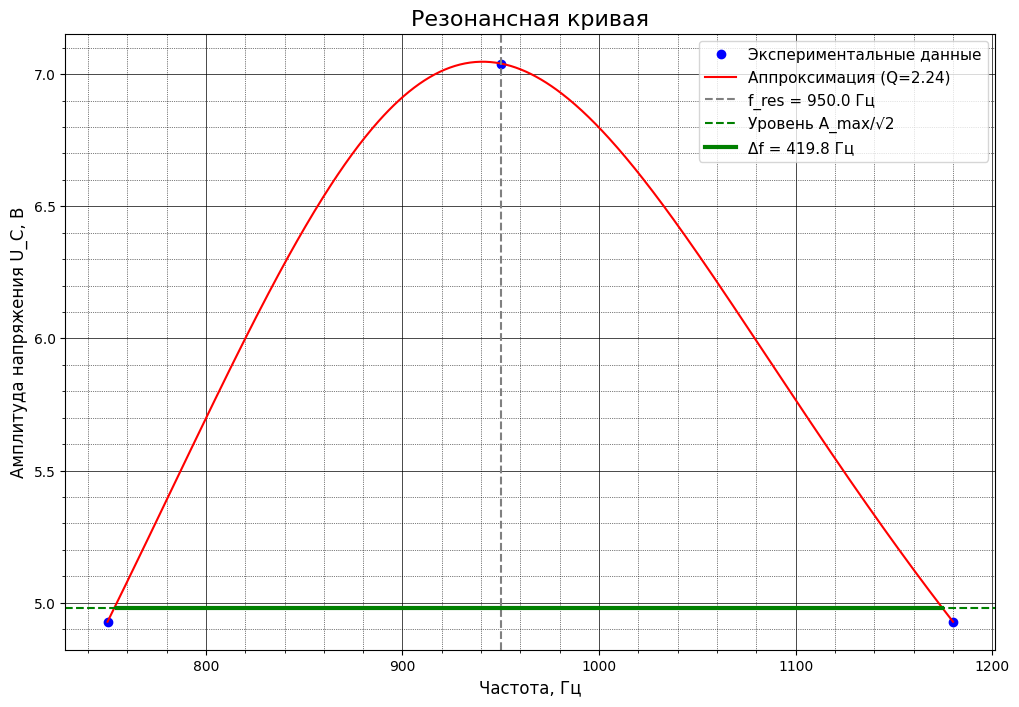

In [ ]:


# --- ШАГ 1: ВВЕДИТЕ ВАШИ ЭКСПЕРИМЕНТАЛЬНЫЕ ДАННЫЕ ---
# Замените эти значения на те, что вы измерили в лаборатории.
# Это просто примерные данные для демонстрации.

# Частота в Герцах (Гц)
frequency = np.array([
    750, 950, 1180
])

# Амплитуда напряжения на конденсаторе в Вольтах (В)
# или амплитуда тока в условных единицах
amplitude = np.array([
    7.04 * 0.7, 7.04, 7.04 * 0.7
])

# --- ШАГ 2: ОБРАБОТКА ДАННЫХ И ПОСТРОЕНИЕ ГРАФИКА ---

# Находим максимальную амплитуду и резонансную частоту по экспериментальным точкам
A_max = np.max(amplitude)
f_res_exp = frequency[np.argmax(amplitude)]

print(f"Экспериментальная резонансная частота: {f_res_exp:.2f} Гц")
print(f"Максимальная амплитуда: {A_max:.2f} В")

# Определяем уровень "половинной мощности" (амплитуда падает в sqrt(2) раз)
level_half_power = A_max / np.sqrt(2)

# Находим ширину кривой Δf на этом уровне (Full Width at Half Maximum - FWHM)
# Для этого интерполируем данные, чтобы найти точные частоты f1 и f2

# Левая сторона от пика
left_side_freq = frequency[frequency <= f_res_exp]
left_side_amp = amplitude[frequency <= f_res_exp]
# Правая сторона от пика
right_side_freq = frequency[frequency >= f_res_exp]
right_side_amp = amplitude[frequency >= f_res_exp]

# Используем линейную интерполяцию для нахождения f1 и f2
# np.interp(y, y_data, x_data) находит x для заданного y
f1 = np.interp(level_half_power, left_side_amp, left_side_freq)
# Для правой стороны нужно перевернуть массивы, т.к. амплитуда убывает
f2 = np.interp(level_half_power, right_side_amp[::-1], right_side_freq[::-1])

delta_f = f2 - f1

# Расчет добротности по экспериментальным данным
Q_factor_exp = f_res_exp / delta_f

print(f"Уровень половинной мощности (A_max / sqrt(2)): {level_half_power:.2f} В")
print(f"Частота f1 (левая граница): {f1:.2f} Гц")
print(f"Частота f2 (правая граница): {f2:.2f} Гц")
print(f"Ширина резонансной кривой (Δf): {delta_f:.2f} Гц")
print(f"Добротность, определенная по графику: Q = {Q_factor_exp:.2f}")

# --- ШАГ 3: (ОПЦИОНАЛЬНО) АППРОКСИМАЦИЯ ТЕОРЕТИЧЕСКОЙ КРИВОЙ ---

# Теоретическая форма резонансной кривой (амплитуда тока)
# A - максимальная амплитуда, f0 - резонансная частота, Q - добротность
def resonance_curve(f, A, f0, Q):
    return A / np.sqrt(1 + Q**2 * (f/f0 - f0/f)**2)

# Начальные предположения для параметров фитирования
initial_guess = [A_max, f_res_exp, Q_factor_exp]

try:
    # Выполняем аппроксимацию
    params, covariance = curve_fit(resonance_curve, frequency, amplitude, p0=initial_guess)
    
    A_fit, f_res_fit, Q_fit = params
    
    print("\n--- Результаты аппроксимации теоретической кривой ---")
    print(f"Амплитуда из фитирования: {A_fit:.2f} В")
    print(f"Резонансная частота из фитирования: {f_res_fit:.2f} Гц")
    print(f"Добротность из фитирования: {Q_fit:.2f}")

    # Создаем плавную кривую на основе полученных параметров
    freq_smooth = np.linspace(frequency.min(), frequency.max(), 500)
    amp_fit = resonance_curve(freq_smooth, A_fit, f_res_fit, Q_fit)
    
except RuntimeError:
    print("\nНе удалось выполнить аппроксимацию. Будет построен только график по точкам.")
    A_fit = None


# --- ШАГ 4: ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ---

plt.figure(figsize=(12, 8))

# Рисуем экспериментальные точки
plt.plot(frequency, amplitude, 'bo', label='Экспериментальные данные')

# Если аппроксимация удалась, рисуем теоретическую кривую
if A_fit is not None:
    plt.plot(freq_smooth, amp_fit, 'r-', label=f'Аппроксимация (Q={Q_fit:.2f})')

# Линии для демонстрации расчета добротности по графику
plt.axvline(x=f_res_exp, color='gray', linestyle='--', label=f'f_res = {f_res_exp:.1f} Гц')
plt.axhline(y=level_half_power, color='green', linestyle='--', label=f'Уровень A_max/√2')
plt.plot([f1, f2], [level_half_power, level_half_power], 'g-', linewidth=3, label=f'Δf = {delta_f:.1f} Гц')

# Настройка внешнего вида графика
plt.title('Резонансная кривая', fontsize=16)
plt.xlabel('Частота, Гц', fontsize=12)
plt.ylabel('Амплитуда напряжения U_C, В', fontsize=12)
plt.grid(True)
plt.legend(fontsize=11)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')

# Показываем график
plt.show()

Экспериментальная резонансная частота: 950.00 Гц
Максимальная амплитуда: 6.24 В
Уровень половинной мощности (A_max / sqrt(2)): 4.41 В
Частота f1 (левая граница): 730.33 Гц
Частота f2 (правая граница): 1179.43 Гц
Ширина резонансной кривой (Δf): 449.10 Гц
Добротность, определенная по графику: Q = 2.12

--- Результаты аппроксимации теоретической кривой ---
Амплитуда из фитирования: 6.27 В
Резонансная частота из фитирования: 926.89 Гц
Добротность из фитирования: 2.08


C:\Users\Аким Тарасов\AppData\Local\Temp\ipykernel_8408\1900438561.py:67: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(resonance_curve, frequency, amplitude, p0=initial_guess)


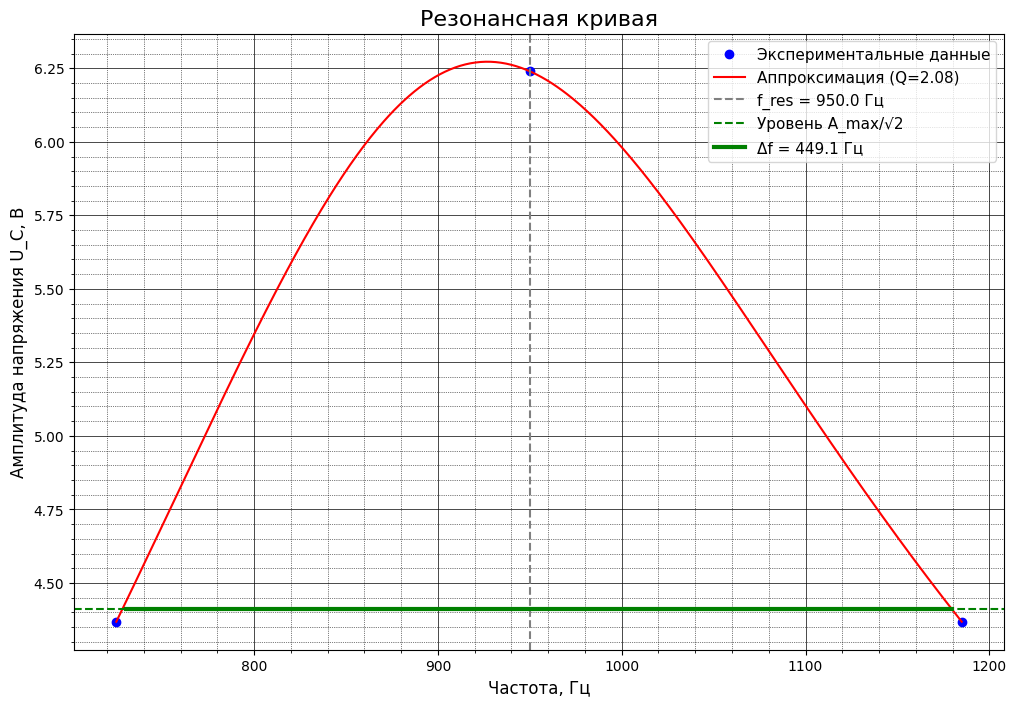

In [36]:
# --- ШАГ 1: ВВЕДИТЕ ВАШИ ЭКСПЕРИМЕНТАЛЬНЫЕ ДАННЫЕ ---
# Замените эти значения на те, что вы измерили в лаборатории.
# Это просто примерные данные для демонстрации.

# Частота в Герцах (Гц)
frequency = np.array([
    725, 950, 1185
])

# Амплитуда напряжения на конденсаторе в Вольтах (В)
# или амплитуда тока в условных единицах
amplitude = np.array([
    6.24 * 0.7, 6.24, 6.24 * 0.7
])

# --- ШАГ 2: ОБРАБОТКА ДАННЫХ И ПОСТРОЕНИЕ ГРАФИКА ---

# Находим максимальную амплитуду и резонансную частоту по экспериментальным точкам
A_max = np.max(amplitude)
f_res_exp = frequency[np.argmax(amplitude)]

print(f"Экспериментальная резонансная частота: {f_res_exp:.2f} Гц")
print(f"Максимальная амплитуда: {A_max:.2f} В")

# Определяем уровень "половинной мощности" (амплитуда падает в sqrt(2) раз)
level_half_power = A_max / np.sqrt(2)

# Находим ширину кривой Δf на этом уровне (Full Width at Half Maximum - FWHM)
# Для этого интерполируем данные, чтобы найти точные частоты f1 и f2

# Левая сторона от пика
left_side_freq = frequency[frequency <= f_res_exp]
left_side_amp = amplitude[frequency <= f_res_exp]
# Правая сторона от пика
right_side_freq = frequency[frequency >= f_res_exp]
right_side_amp = amplitude[frequency >= f_res_exp]

# Используем линейную интерполяцию для нахождения f1 и f2
# np.interp(y, y_data, x_data) находит x для заданного y
f1 = np.interp(level_half_power, left_side_amp, left_side_freq)
# Для правой стороны нужно перевернуть массивы, т.к. амплитуда убывает
f2 = np.interp(level_half_power, right_side_amp[::-1], right_side_freq[::-1])

delta_f = f2 - f1

# Расчет добротности по экспериментальным данным
Q_factor_exp = f_res_exp / delta_f

print(f"Уровень половинной мощности (A_max / sqrt(2)): {level_half_power:.2f} В")
print(f"Частота f1 (левая граница): {f1:.2f} Гц")
print(f"Частота f2 (правая граница): {f2:.2f} Гц")
print(f"Ширина резонансной кривой (Δf): {delta_f:.2f} Гц")
print(f"Добротность, определенная по графику: Q = {Q_factor_exp:.2f}")

# --- ШАГ 3: (ОПЦИОНАЛЬНО) АППРОКСИМАЦИЯ ТЕОРЕТИЧЕСКОЙ КРИВОЙ ---

# Теоретическая форма резонансной кривой (амплитуда тока)
# A - максимальная амплитуда, f0 - резонансная частота, Q - добротность
def resonance_curve(f, A, f0, Q):
    return A / np.sqrt(1 + Q**2 * (f/f0 - f0/f)**2)

# Начальные предположения для параметров фитирования
initial_guess = [A_max, f_res_exp, Q_factor_exp]

try:
    # Выполняем аппроксимацию
    params, covariance = curve_fit(resonance_curve, frequency, amplitude, p0=initial_guess)
    
    A_fit, f_res_fit, Q_fit = params
    
    print("\n--- Результаты аппроксимации теоретической кривой ---")
    print(f"Амплитуда из фитирования: {A_fit:.2f} В")
    print(f"Резонансная частота из фитирования: {f_res_fit:.2f} Гц")
    print(f"Добротность из фитирования: {Q_fit:.2f}")

    # Создаем плавную кривую на основе полученных параметров
    freq_smooth = np.linspace(frequency.min(), frequency.max(), 500)
    amp_fit = resonance_curve(freq_smooth, A_fit, f_res_fit, Q_fit)
    
except RuntimeError:
    print("\nНе удалось выполнить аппроксимацию. Будет построен только график по точкам.")
    A_fit = None


# --- ШАГ 4: ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ---

plt.figure(figsize=(12, 8))

# Рисуем экспериментальные точки
plt.plot(frequency, amplitude, 'bo', label='Экспериментальные данные')

# Если аппроксимация удалась, рисуем теоретическую кривую
if A_fit is not None:
    plt.plot(freq_smooth, amp_fit, 'r-', label=f'Аппроксимация (Q={Q_fit:.2f})')

# Линии для демонстрации расчета добротности по графику
plt.axvline(x=f_res_exp, color='gray', linestyle='--', label=f'f_res = {f_res_exp:.1f} Гц')
plt.axhline(y=level_half_power, color='green', linestyle='--', label=f'Уровень A_max/√2')
plt.plot([f1, f2], [level_half_power, level_half_power], 'g-', linewidth=3, label=f'Δf = {delta_f:.1f} Гц')

# Настройка внешнего вида графика
plt.title('Резонансная кривая', fontsize=16)
plt.xlabel('Частота, Гц', fontsize=12)
plt.ylabel('Амплитуда напряжения U_C, В', fontsize=12)
plt.grid(True)
plt.legend(fontsize=11)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')

# Показываем график
plt.show()

Экспериментальная резонансная частота: 950.00 Гц
Максимальная амплитуда: 5.52 В
Уровень половинной мощности (A_max / sqrt(2)): 3.90 В
Частота f1 (левая граница): 642.46 Гц
Частота f2 (правая граница): 1203.84 Гц
Ширина резонансной кривой (Δf): 561.38 Гц
Добротность, определенная по графику: Q = 1.69

--- Результаты аппроксимации теоретической кривой ---
Амплитуда из фитирования: 5.71 В
Резонансная частота из фитирования: 876.56 Гц
Добротность из фитирования: 1.66


C:\Users\Аким Тарасов\AppData\Local\Temp\ipykernel_8408\245638273.py:67: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(resonance_curve, frequency, amplitude, p0=initial_guess)


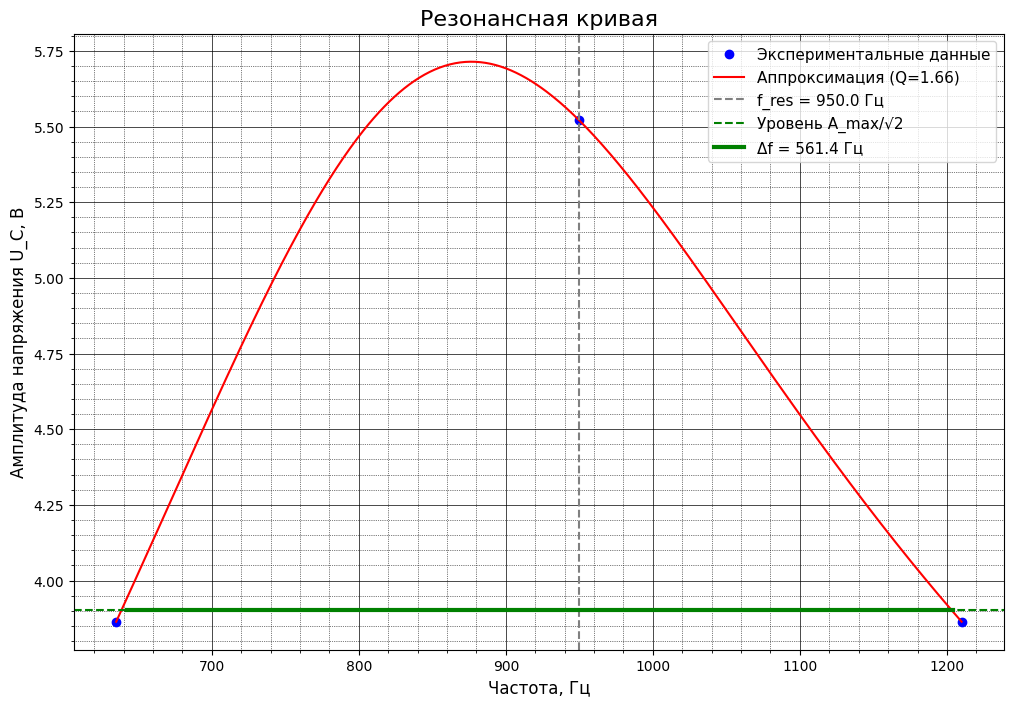

In [37]:
# --- ШАГ 1: ВВЕДИТЕ ВАШИ ЭКСПЕРИМЕНТАЛЬНЫЕ ДАННЫЕ ---
# Замените эти значения на те, что вы измерили в лаборатории.
# Это просто примерные данные для демонстрации.

# Частота в Герцах (Гц)
frequency = np.array([
    635, 950, 1210
])

# Амплитуда напряжения на конденсаторе в Вольтах (В)
# или амплитуда тока в условных единицах
amplitude = np.array([
    5.52 * 0.7, 5.52, 5.52 * 0.7
])

# --- ШАГ 2: ОБРАБОТКА ДАННЫХ И ПОСТРОЕНИЕ ГРАФИКА ---

# Находим максимальную амплитуду и резонансную частоту по экспериментальным точкам
A_max = np.max(amplitude)
f_res_exp = frequency[np.argmax(amplitude)]

print(f"Экспериментальная резонансная частота: {f_res_exp:.2f} Гц")
print(f"Максимальная амплитуда: {A_max:.2f} В")

# Определяем уровень "половинной мощности" (амплитуда падает в sqrt(2) раз)
level_half_power = A_max / np.sqrt(2)

# Находим ширину кривой Δf на этом уровне (Full Width at Half Maximum - FWHM)
# Для этого интерполируем данные, чтобы найти точные частоты f1 и f2

# Левая сторона от пика
left_side_freq = frequency[frequency <= f_res_exp]
left_side_amp = amplitude[frequency <= f_res_exp]
# Правая сторона от пика
right_side_freq = frequency[frequency >= f_res_exp]
right_side_amp = amplitude[frequency >= f_res_exp]

# Используем линейную интерполяцию для нахождения f1 и f2
# np.interp(y, y_data, x_data) находит x для заданного y
f1 = np.interp(level_half_power, left_side_amp, left_side_freq)
# Для правой стороны нужно перевернуть массивы, т.к. амплитуда убывает
f2 = np.interp(level_half_power, right_side_amp[::-1], right_side_freq[::-1])

delta_f = f2 - f1

# Расчет добротности по экспериментальным данным
Q_factor_exp = f_res_exp / delta_f

print(f"Уровень половинной мощности (A_max / sqrt(2)): {level_half_power:.2f} В")
print(f"Частота f1 (левая граница): {f1:.2f} Гц")
print(f"Частота f2 (правая граница): {f2:.2f} Гц")
print(f"Ширина резонансной кривой (Δf): {delta_f:.2f} Гц")
print(f"Добротность, определенная по графику: Q = {Q_factor_exp:.2f}")

# --- ШАГ 3: (ОПЦИОНАЛЬНО) АППРОКСИМАЦИЯ ТЕОРЕТИЧЕСКОЙ КРИВОЙ ---

# Теоретическая форма резонансной кривой (амплитуда тока)
# A - максимальная амплитуда, f0 - резонансная частота, Q - добротность
def resonance_curve(f, A, f0, Q):
    return A / np.sqrt(1 + Q**2 * (f/f0 - f0/f)**2)

# Начальные предположения для параметров фитирования
initial_guess = [A_max, f_res_exp, Q_factor_exp]

try:
    # Выполняем аппроксимацию
    params, covariance = curve_fit(resonance_curve, frequency, amplitude, p0=initial_guess)
    
    A_fit, f_res_fit, Q_fit = params
    
    print("\n--- Результаты аппроксимации теоретической кривой ---")
    print(f"Амплитуда из фитирования: {A_fit:.2f} В")
    print(f"Резонансная частота из фитирования: {f_res_fit:.2f} Гц")
    print(f"Добротность из фитирования: {Q_fit:.2f}")

    # Создаем плавную кривую на основе полученных параметров
    freq_smooth = np.linspace(frequency.min(), frequency.max(), 500)
    amp_fit = resonance_curve(freq_smooth, A_fit, f_res_fit, Q_fit)
    
except RuntimeError:
    print("\nНе удалось выполнить аппроксимацию. Будет построен только график по точкам.")
    A_fit = None


# --- ШАГ 4: ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ---

plt.figure(figsize=(12, 8))

# Рисуем экспериментальные точки
plt.plot(frequency, amplitude, 'bo', label='Экспериментальные данные')

# Если аппроксимация удалась, рисуем теоретическую кривую
if A_fit is not None:
    plt.plot(freq_smooth, amp_fit, 'r-', label=f'Аппроксимация (Q={Q_fit:.2f})')

# Линии для демонстрации расчета добротности по графику
plt.axvline(x=f_res_exp, color='gray', linestyle='--', label=f'f_res = {f_res_exp:.1f} Гц')
plt.axhline(y=level_half_power, color='green', linestyle='--', label=f'Уровень A_max/√2')
plt.plot([f1, f2], [level_half_power, level_half_power], 'g-', linewidth=3, label=f'Δf = {delta_f:.1f} Гц')

# Настройка внешнего вида графика
plt.title('Резонансная кривая', fontsize=16)
plt.xlabel('Частота, Гц', fontsize=12)
plt.ylabel('Амплитуда напряжения U_C, В', fontsize=12)
plt.grid(True)
plt.legend(fontsize=11)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')

# Показываем график
plt.show()